In [1]:
import json
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from prototypes.classical.descriptors.texture import LBPTransformer, HoGTransformer, GaborTransformer
from prototypes.classical.dataloader.Loader import IsiCancerData
from prototypes.classical.descriptors.vetorizer import LBPVectorizer
import torch
from prototypes.classical.descriptors.vetorizer import GaborAttentionLBPVectors
from prototypes.deeplearning.dataloader.IsicDataLoader import LoadDataVectors

%load_ext autoreload
%autoreload 2

with open("../config.json", "r") as f:
    config = json.load(f)

In [2]:
train_csv = pd.read_csv(config["TRAIN_METADATA"])

/tmp/ipykernel_43284/550750344.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_csv = pd.read_csv(config["TRAIN_METADATA"])


In [3]:
image_file_name = train_csv.query("target==1").to_numpy()[0][0] + ".jpg"

cancer_image = cv2.imread(os.path.join(config["TRAIN_IMAGES_PATH"], image_file_name), cv2.IMREAD_COLOR)[:,:,::-1]

In [4]:
vectorizer = GaborAttentionLBPVectors()

In [5]:
vectorizer.transform(cancer_image).shape

(2295,)

In [6]:
vector = vectorizer.transform(cancer_image)

In [7]:
vector

array([0.01481166, 0.02770526, 0.        , ..., 0.        , 0.        ,
       0.74964036])

In [8]:
import h5py

DATASET_PATH = config["DATASET_PATH"]

test_hd5f = h5py.File(os.path.join(DATASET_PATH, "test-image.hdf5"), "r")

In [9]:
keys = list(test_hd5f.keys())

In [10]:
keys

['ISIC_0015657', 'ISIC_0015729', 'ISIC_0015740']

image array bytes = b'\xff\xd8\xff\xe0\x00\x10JFIF'
Shape of the image: (141, 141, 3)


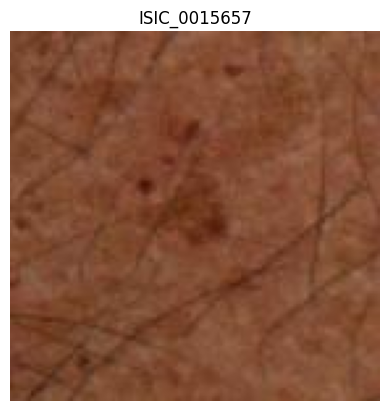

In [11]:
from PIL import Image
import io

index = 0
dataset = test_hd5f[keys[index]]

image_arr_bytes = dataset[()]
print(f"image array bytes = {image_arr_bytes[:10]}")
       
for name, val in  dataset.attrs.items():
    print (name, val)

# Convert the byte array to a PIL image
image = Image.open(io.BytesIO(image_arr_bytes))

# Convert PIL image to a NumPy array
image_array = np.array(image)

# Print the shape of the image
print(f"Shape of the image: {image_array.shape}")

# Display the image using matplotlib
plt.imshow(image)
plt.title(keys[index])
plt.axis('off')  # Hide axes
plt.show()

In [12]:
load_vectors = LoadDataVectors(hd5_file_path=os.path.join(DATASET_PATH, "train-image.hdf5"),
                               metadata_csv_path=os.path.join(DATASET_PATH, "train-metadata.csv"),
                               target_columns=["target"],
                               transform=GaborAttentionLBPVectors())

In [13]:
feature_vector, target = next(iter(load_vectors))

In [14]:
target

array([[0]])

In [15]:
vector_dataloader = torch.utils.data.DataLoader(load_vectors, batch_size=8, shuffle=True, num_workers=8)

In [16]:
next(iter(vector_dataloader))

[tensor([[0.0074, 0.0117, 0.0000,  ..., 0.0000, 0.0000, 0.8619],
         [0.0145, 0.0266, 0.0000,  ..., 0.0000, 0.0000, 0.7668],
         [0.0125, 0.0227, 0.0000,  ..., 0.0000, 0.0000, 0.7239],
         ...,
         [0.0102, 0.0193, 0.0000,  ..., 0.0000, 0.0000, 0.8714],
         [0.0056, 0.0134, 0.0000,  ..., 0.0000, 0.0000, 0.9323],
         [0.0055, 0.0093, 0.0000,  ..., 0.0000, 0.0000, 0.9260]],
        dtype=torch.float64),
 tensor([[[0]],
 
         [[0]],
 
         [[0]],
 
         [[0]],
 
         [[0]],
 
         [[0]],
 
         [[0]],
 
         [[0]]])]